<div>
    <h2> Theory for linear regression approach </h2>
<img src="theory1.jpeg" alt="Drawing" style="width: 500px;"/>
<img src="theory2.jpeg" alt="Drawing" style="width: 500px;"/>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def generate_data(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)*7
    y = 5*X + 2 + noise
    return X, y

In [19]:
def plot_data(X, y, title='Data'):
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

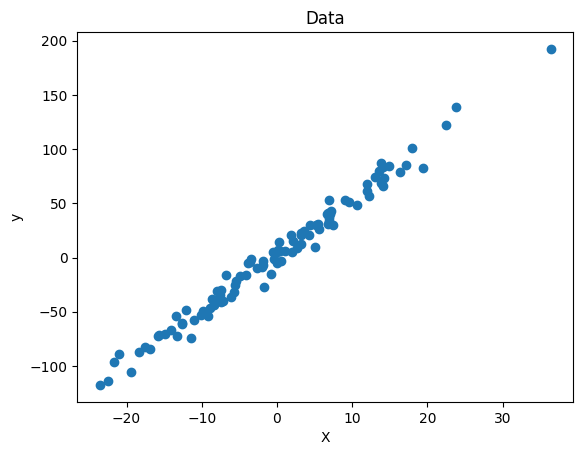

In [20]:
X, y = generate_data(100)
plot_data(X, y)

## Importance of Normalization/Standardization
Currently we have considered a single feature, it could be multiple features as well. The formula to get next iteration of feature (theta_i) multiplies the feature x^(i) with it, so if we have multiple features each of the theta will have corresponding feature value in the update step. Each feature will have its own scale (for eg. age, weight would have different scales) which will cause each feature to change with different amounts in each iteration which might cause issues in convergence. Standardization is the process of scaling the feature distribution to make its mean 0 and standard deviation 1. We apply it to all the features, so that the scale of all the features becomes same which helps with easy convergence.
Formula is,
X = (X - mean)/(std deviation)

In [27]:
def normalize_data(X):
    X = (X - X.mean())/X.std()
    return X


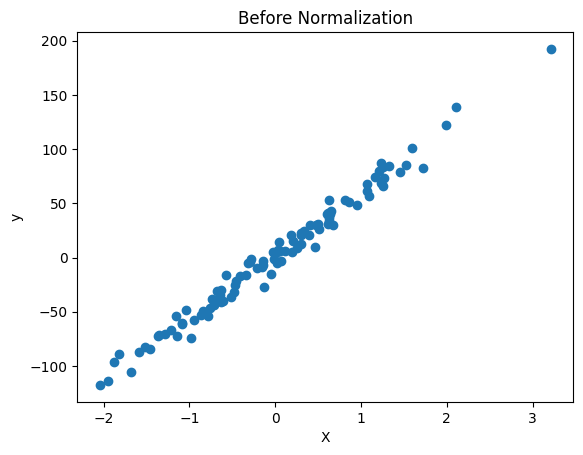

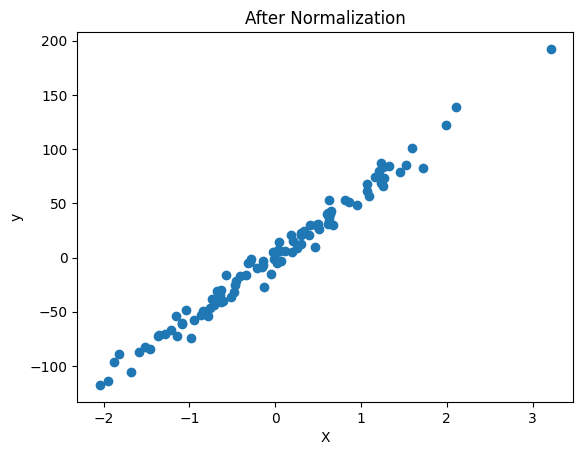

Mean(x) = -2.220446049250313e-18, Std(X) = 1.0


In [28]:
plot_data(X, y, 'Before Normalization')
X = normalize_data(X)
plot_data(X, y, 'After Normalization')
print(f"Mean(x) = {X.mean()}, Std(X) = {X.std()}")

In [29]:
X.shape

(100,)

In [45]:
def train_test_split(X, y, split_factor = 0.8):
    m = X.shape[0]
    data = np.zeros((m,2))
    data[:,0] = X
    data[:,1] = y
    np.random.shuffle(data)
    
    split = int(m*split_factor)
    # training split
    XT = data[:split, 0]
    yT = data[:split, 1]
    # testing split
    Xt = data[split:, 0]
    yt = data[split:, 1]
    return XT, yT, Xt, yt
    

Training data shape X (80,) y (80,)
Testing data shape X (20,) y (20,)


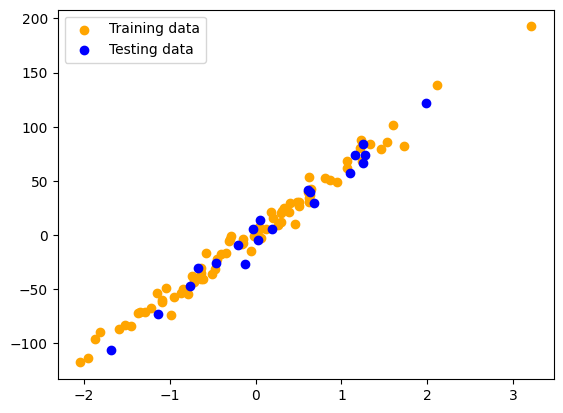

In [47]:
XT, yT, Xt, yt = train_test_split(X, y)
print(f"Training data shape X {XT.shape} y {yT.shape}")
print(f"Testing data shape X {Xt.shape} y {yt.shape}")
plt.scatter(XT, yT, color='orange', label='Training data')
plt.scatter(Xt, yt, color='blue', label='Testing data')
plt.legend()
plt.show()

In [72]:
def hypothesis(X, theta):
    return theta[0] + theta[1]*X


def error(X, y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        e += (hypothesis(X[i], theta) - y[i])**2
    return e/(2*m)


def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i], theta) - y[i]
        grad[0] += exp
        grad[1] += (exp*X[i])
    return grad/m


def train(X, y, learning_rate = 0.1, iterations = 100):
    theta = np.zeros((2,))
    errors = []
    for i in range(iterations):
        grad = gradient(X, y, theta)
        theta[0] = theta[0] - (learning_rate * grad[0])
        theta[1] = theta[1] - (learning_rate * grad[1])
        errors.append(error(X, y, theta))

    # plotting the error
    plt.plot(errors)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.plot()
    return theta

array([ 1.91177996, 57.81521517])

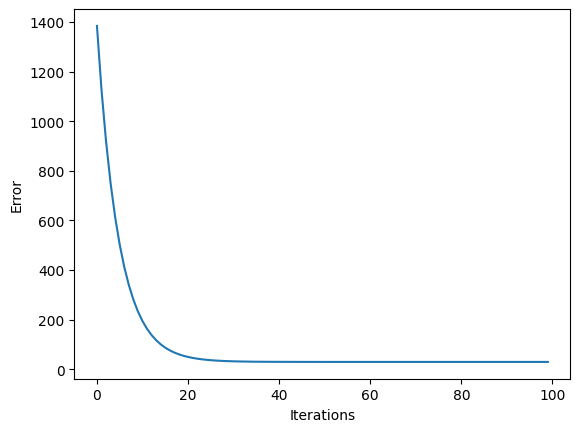

In [73]:
train(X, y)